In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
%matplotlib inline

### 1. Moore's Law
Use the scripts from [here](https://github.com/preshing/analyze-spec-benchmarks) to download a large amount of data relating to CPU specs. The scripts might take as long as an hour, depending on your connection speed. (Pay attention to the line "If you want to skip the steps in this section, you can simply download the aggregated result files from http://preshing.com/files/specdata20120207.zip and extract them to this folder." This will be faster and save you some troubles while providing the same dataset.)

In [2]:
cpu_data = pd.read_table('/Users/Dima/Downloads/ML/cs156-pcw-ldiima/02/specdata20120207/benchmarks.txt',sep=',')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Now do the following:

- Extract the date and base speed for a benchmark of your choice.
- Plot the data in a semi-log plot.
- Now train a linear model to fit your plot.
- How well is Moore's Law holding up?

In [3]:
swim_data=cpu_data.loc[cpu_data['benchName']=="102.swim"]

# calculate the number of days between two dates
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

benchmark = cpu_data['benchName'].unique()[10]

print(benchmark) #099.go

# extract date from test ID
go_data = cpu_data[(cpu_data['benchName'] == benchmark) & (cpu_data['testID'].str.startswith('cpu'))][['testID','base']]

go_data['testID'] = go_data['testID'].str[6:-6]
go_data['testID'] = pd.to_datetime(go_data['testID'])

#convert date to days
go_data['testID'] = go_data['testID'].map(lambda testID : ((testID - min(go_data['testID'])).days))

#convert base time to log
go_data['base'] = go_data['base'].astype(float)
go_data['logbase'] = np.log(go_data['base'])

099.go


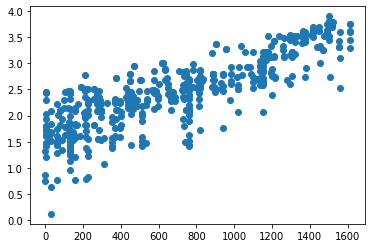

In [4]:
plt.scatter(go_data['testID'],go_data['logbase'])
plt.show()

Coefficients: 
 [[0.00119394]]
Mean squared error: 0.15
Coefficient of determination: 0.09
Coefficients: 
 [[0.00119394]]


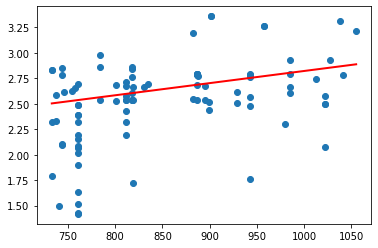

In [5]:
from sklearn.linear_model import LinearRegression

# split data into training and test sets
x_train = go_data['testID'][:-400]
x_test = go_data['testID'][-400:]

# split targets into training and test sets
y_train = go_data['logbase'][:-400]
y_test = go_data['logbase'][-400:]

x_train = np.array(go_data['testID'][:494]).reshape(494, -1)
y_train = np.array(go_data['logbase'][:494]).reshape(494,-1)
x_test = np.array(go_data['testID'][400:]).reshape(94, -1)
y_test = np.array(go_data['logbase'][400:]).reshape(94,-1)

# create a linear regression object
regr = linear_model.LinearRegression()

# train the model using the training sets
regr.fit(x_train, y_train)

# make predictions using the testing set
# y_pred = regr.predict(x_train)
# y_pred = np.append(y_pred, regression.predict(x_test))
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

print('Coefficients: \n', regr.coef_)

# Plot
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

### 2. MNIST Digits
No machine learning course would be complete without using the MNIST dataset. This dataset was a hugely influential dataset of handwriting digits (0-9).

- Using scikit-learn, load the MNIST digits (see [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)).
- Plot some of the examples.
- Choose two digit classes (e.g. 7s and 3s), and train a k-nearest neighbor classifier.
- Report your error rates on a held out part of the data.
(optional) Test your model on the full dataset (available from [here](http://yann.lecun.com/exdb/mnist/)).

Keep a record of your figures and results, and make sure that they are easily accessible when you come to class (e.g. be able to state your error rate, or paste your code/figure into a group doc.)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.datasets import load_digits

In [32]:
digits = datasets.load_digits()
print(len(digits.target)) #1797
data, target = digits.images.reshape((1797,-1)), digits.target

two_digits = np.where((target == 0 ) | (target == 1))

data_train, target_train = data[two_digits][:250],target[two_digits][:250]
data_test,target_test = data[two_digits][250:],target[two_digits][250:]

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data_train, target_train)
target_pred = neigh.predict(data_test)
err = target_pred - target_test
error_rate = (len(target_test)-sum(err>0))/len(target_pred)
print("error rate for digits 0 and 1:", error_rate)

1797
error rate for digits 0 and 1: 1.0


In [35]:
digits = datasets.load_digits()
data, target = digits.images.reshape((1797,-1)), digits.target

two_digits = np.where((target == 3 ) | (target == 5))

data_train, target_train = data[two_digits][:250],target[two_digits][:250]
data_test,target_test = data[two_digits][250:],target[two_digits][250:]

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(data_train, target_train)
target_pred = neigh.predict(data_test)
err = target_pred - target_test
error_rate = (len(target_test)-sum(err>0))/len(target_pred)
print("error rate for digits 3 and 5:", sum(err>0))

error rate for digits 3 and 5: 1
